In [23]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
originalData = pd.read_csv("tomslee_airbnb_new_york_1196_2017-05-06.csv")
originalData = originalData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
                          'price', 'longitude','latitude','property_type']]


originalData = originalData[originalData.overall_satisfaction.map(lambda x:not math.isnan(x))]
originalData = originalData[originalData.reviews.map(lambda x:x is not 0)]
originalData = originalData[originalData.price.map(lambda x: x<2000)]
originalData.reset_index(drop = True, inplace=True)
display(originalData.describe())
display(originalData.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Shared room,Manhattan,5,3,4.5,1.0,240.0,-73.956041,40.772774,Apartment
1,Shared room,Manhattan,2,4,5.0,1.0,110.0,-73.954550,40.771820,Apartment
2,Shared room,Manhattan,2,3,5.0,1.0,105.0,-73.943941,40.780694,Apartment
3,Shared room,Manhattan,3,7,4.5,1.0,114.0,-73.943762,40.786761,Apartment
4,Shared room,Brooklyn,2,1,0.0,1.0,99.0,-73.982937,40.694308,Apartment


In [24]:
print(originalData.columns)
display(originalData.describe())
display(originalData['borough'].value_counts())
display(originalData['room_type'].value_counts())
display(originalData['property_type'].value_counts())

Index(['room_type', 'borough', 'accommodates', 'reviews',
       'overall_satisfaction', 'bedrooms', 'price', 'longitude', 'latitude',
       'property_type'],
      dtype='object')


,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


Manhattan        14698
Brooklyn         12723
Queens            3033
Bronx              485
Staten Island      193
Name: borough, dtype: int64

Entire home/apt    15954
Private room       14348
Shared room          830
Name: room_type, dtype: int64

Apartment             26499
House                  2798
Loft                    677
Townhouse               454
Condominium             268
Other                   157
Bed & Breakfast         131
Guesthouse               32
Timeshare                23
Hostel                   19
Villa                    15
Dorm                     12
Bungalow                 12
Boutique hotel           10
Serviced apartment        5
Boat                      4
Guest suite               4
Cabin                     3
Castle                    2
Cave                      1
Vacation home             1
Hut                       1
Chalet                    1
In-law                    1
Lighthouse                1
Earth House               1
Name: property_type, dtype: int64

In [27]:
sampledData = originalData.sample(frac=0.1).reset_index(drop=True)
usefulData = sampledData.sample(frac=1).reset_index(drop=True)

In [28]:
# usefulData = sampledData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
#                            'price', 'longitude']]
# usefulData = sampledData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price']]
display(usefulData.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Brooklyn,2,95,5.0,0.0,125.0,-73.943276,40.721256,Apartment
1,Entire home/apt,Brooklyn,3,3,4.5,1.0,165.0,-73.952168,40.723975,House
2,Entire home/apt,Manhattan,5,25,4.0,2.0,220.0,-73.962862,40.758275,Apartment
3,Entire home/apt,Manhattan,2,2,0.0,1.0,180.0,-74.003905,40.733196,Apartment
4,Entire home/apt,Brooklyn,4,3,5.0,1.0,132.0,-73.957279,40.733538,Apartment


In [67]:
print(usefulData.head().to_latex())

\begin{tabular}{lllrrrrrrrl}
\toprule
{} &        room\_type &    borough &  accommodates &  reviews &  overall\_satisfaction &  bedrooms &  price &  longitude &   latitude & property\_type \\
\midrule
0 &  Entire home/apt &   Brooklyn &             2 &       95 &                   5.0 &       0.0 &  125.0 & -73.943276 &  40.721256 &     Apartment \\
1 &  Entire home/apt &   Brooklyn &             3 &        3 &                   4.5 &       1.0 &  165.0 & -73.952168 &  40.723975 &         House \\
2 &  Entire home/apt &  Manhattan &             5 &       25 &                   4.0 &       2.0 &  220.0 & -73.962862 &  40.758275 &     Apartment \\
3 &  Entire home/apt &  Manhattan &             2 &        2 &                   0.0 &       1.0 &  180.0 & -74.003905 &  40.733196 &     Apartment \\
4 &  Entire home/apt &   Brooklyn &             4 &        3 &                   5.0 &       1.0 &  132.0 & -73.957279 &  40.733538 &     Apartment \\
\bottomrule
\end{tabular}



In [48]:
# broughChosen = ['Manhattan', 'Brooklyn']
data_p1 = usefulData[usefulData['borough'].map(lambda x: x in broughChosen)]

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Brooklyn,2,95,5.0,0.0,125.0,-73.943276,40.721256,Apartment
1,Entire home/apt,Brooklyn,3,3,4.5,1.0,165.0,-73.952168,40.723975,House
2,Entire home/apt,Manhattan,5,25,4.0,2.0,220.0,-73.962862,40.758275,Apartment
3,Entire home/apt,Manhattan,2,2,0.0,1.0,180.0,-74.003905,40.733196,Apartment
4,Entire home/apt,Brooklyn,4,3,5.0,1.0,132.0,-73.957279,40.733538,Apartment


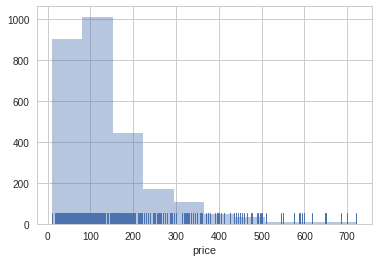

In [49]:
# view the distribution of price for the labeling later
tmp = data_p1[data_p1.price.map(lambda x: x<750)]
sns.distplot(tmp['price'].sort_values(), bins=10, kde=False, rug=True);
# data_p1 = data_p1.drop(axis=1,labels=['price'])
data_p1.reset_index(drop = True, inplace=True)
display(data_p1.head())

In [50]:
lableLow = data_p1['price'].map(lambda x: x <85)
lableMid = data_p1['price'].map(lambda x: x<=149 and x >= 85)
lableHigh = data_p1['price'].map(lambda x: x >149)
print(lableLow.value_counts(),lableMid.value_counts(), lableHigh.value_counts())
p1_price = data_p1['price']
data_p1 = data_p1.drop(axis=1,labels=['price'])

False    1832
True      912
Name: price, dtype: int64 False    1844
True      900
Name: price, dtype: int64 False    1812
True      932
Name: price, dtype: int64


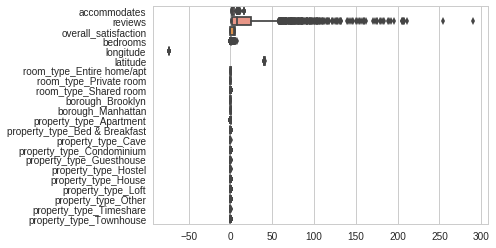

In [51]:
data_p1_coded = pd.get_dummies(data_p1)
sns.set_style("whitegrid")
plot = sns.boxplot(data=data_p1_coded, orient='h')
plot.set_yticklabels(data_p1_coded.columns);

In [52]:
data1 = np.array(data_p1_coded)
display(data_p1_coded.head())
x = (data1-data1.mean(axis=0))/data1.std(axis=0)
tmp = pd.DataFrame(x)
display(tmp.head())

,accommodates,reviews,overall_satisfaction,bedrooms,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,borough_Brooklyn,...,property_type_Bed & Breakfast,property_type_Cave,property_type_Condominium,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse
0,2,95,5.0,0.0,-73.943276,40.721256,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,3,4.5,1.0,-73.952168,40.723975,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,5,25,4.0,2.0,-73.962862,40.758275,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0.0,1.0,-74.003905,40.733196,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3,5.0,1.0,-73.957279,40.733538,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.510656,2.500745,0.726856,-1.631598,0.813985,-0.134483,0.939165,-0.894061,-0.158202,1.034109,...,-0.060478,-0.019094,-0.087818,-0.033083,-0.027007,-0.244681,-0.158202,-0.063442,-0.027007,-0.141684
1,0.062448,-0.568715,0.484364,-0.224588,0.462461,-0.082284,0.939165,-0.894061,-0.158202,1.034109,...,-0.060478,-0.019094,-0.087818,-0.033083,-0.027007,4.086958,-0.158202,-0.063442,-0.027007,-0.141684
2,1.208658,0.165286,0.241873,1.182421,0.039700,0.576200,0.939165,-0.894061,-0.158202,-0.967016,...,-0.060478,-0.019094,-0.087818,-0.033083,-0.027007,-0.244681,-0.158202,-0.063442,-0.027007,-0.141684
3,-0.510656,-0.602078,-1.698059,-0.224588,-1.582834,0.094739,0.939165,-0.894061,-0.158202,-0.967016,...,-0.060478,-0.019094,-0.087818,-0.033083,-0.027007,-0.244681,-0.158202,-0.063442,-0.027007,-0.141684
4,0.635553,-0.568715,0.726856,-0.224588,0.260410,0.101304,0.939165,-0.894061,-0.158202,1.034109,...,-0.060478,-0.019094,-0.087818,-0.033083,-0.027007,-0.244681,-0.158202,-0.063442,-0.027007,-0.141684


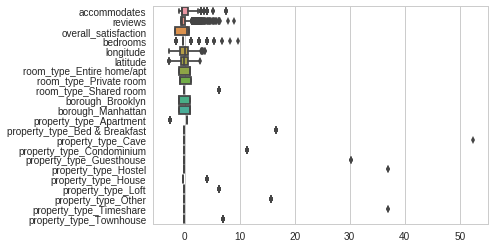

In [53]:
# plt.boxplot(x,vert=False);
plotNorm = sns.boxplot(data=x, orient='h')
plotNorm.set_yticklabels(data_p1_coded.columns);
# plotNorm.figure.set_size_inches(10,5)

In [54]:
covMatrix = x.transpose().dot(x)/x.shape[0]

In [55]:
(eigenVals,eigneVectors)= np.linalg.eig(covMatrix)
idx = eigenVals.argsort()[::-1]   
eigenVals = eigenVals[idx]
eigneVectors = eigneVectors[:,idx]

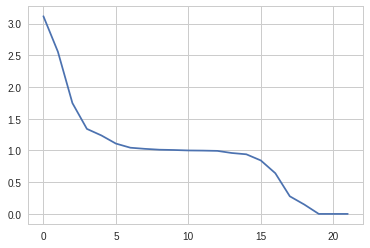

In [56]:
plt.plot(eigenVals);

In [57]:
totalEigenval = []
tmp = 0
eigenvalSum = sum(eigenVals)
for val in eigenVals:
    tmp += val
    totalEigenval.append(tmp/eigenvalSum)
print(totalEigenval)

[0.14165456264013457, 0.2578615608746691, 0.33729882579827392, 0.398222936881514, 0.45445998751966105, 0.50486994736666257, 0.5523122589424001, 0.59894490514940624, 0.64496216142528551, 0.69076797740696505, 0.73624621154874059, 0.78162150934865549, 0.8267934690394656, 0.87044151636824096, 0.91316627408739404, 0.95148432432397045, 0.98065181775233468, 0.99328225257271829, 0.99999999999999989, 1.0, 1.0, 1.0]


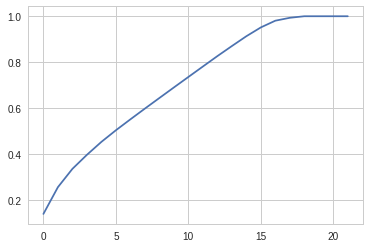

In [58]:
plt.plot(totalEigenval);

In [59]:
print(data_p1_coded.columns)
print(eigneVectors[:,0])
print(eigneVectors[:,1])

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Cave',
       'property_type_Condominium', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse'],
      dtype='object')
[ 0.03474502 -0.01375464  0.01582258 -0.05378943 -0.24636695  0.42237117
  0.17839492 -0.17966092  0.00160748 -0.51866876  0.51866876  0.2736206
 -0.06124764 -0.01364797 -0.02949966 -0.03364444  0.00581188 -0.23981236
 -0.10247149 -0.00342314  0.0129569  -0.07207086]
[ 0.50096022  0.10807568  0.13013077  0.37057593 -0.07846715 -0.10359483
  0.50296271 -0.48810175 -0.05480242  0.05392991 -0.05392991 -0.17559036
  0.00

In [60]:
# x is actually X^T
X_tilde1 = x.dot(eigneVectors[:,:3])

In [61]:
X_tilde1 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde1['price'] = p1_price

In [62]:
def priceLabel(price):
    if price < 85:
        return 'low'
    elif price >= 149:
        return 'high'
    else:
        return 'middle'
    
X_tilde1['label'] = X_tilde1['price'].map(priceLabel)

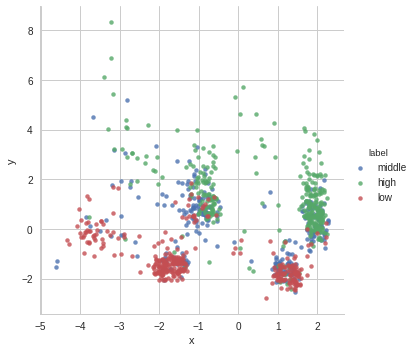

In [63]:
sns.lmplot('x', 'y',data=X_tilde1[:1000],fit_reg=False,hue="label",  scatter_kws={"marker": "D", "s": 20});

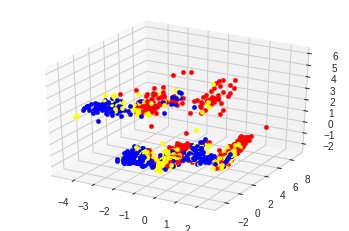

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = {'high':'red','middle':'yellow', 'low':'blue'}
for (Px,Py,Pz,label) in np.array(X_tilde1.loc[:,['x','y','z','label']]):
    ax.scatter(Px, Py, Pz, c=color[label])